# **CERVIARC**

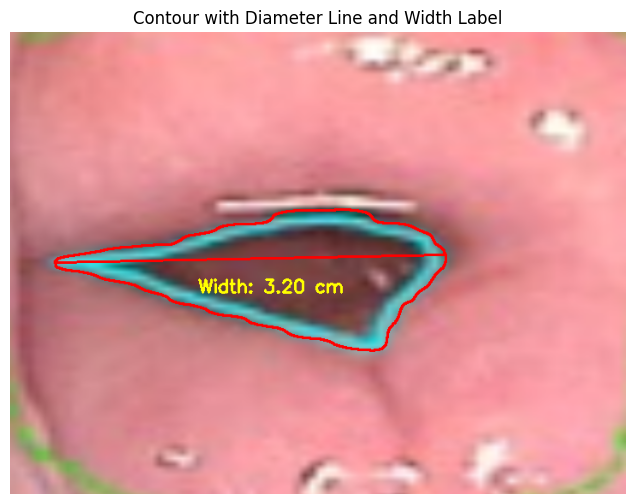

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

image = cv2.imread('Cervix.png')
image = cv2.resize(image, (720, 540))

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, np.array([70, 50, 50]), np.array([100, 255, 255]))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    contour = max(contours, key=cv2.contourArea)
    output = image.copy()
    cv2.drawContours(output, [contour], -1, (0, 0, 255), 2)

    max_dist, pt1, pt2 = 0, None, None
    for a, b in combinations(contour[:, 0], 2):
        dist = np.linalg.norm(a - b)
        if dist > max_dist:
            max_dist, pt1, pt2 = dist, tuple(a), tuple(b)

    cv2.line(output, pt1, pt2, (0, 0, 255), 2)

    mid_x = (pt1[0] + pt2[0]) // 2
    mid_y = (pt1[1] + pt2[1]) // 2

    cm_per_pixel = 3.5 / 500
    width_cm = max_dist * cm_per_pixel

    cv2.putText(output, f"Width: {width_cm:.2f} cm", (mid_x - 60, mid_y + 40),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)

    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Contour with Diameter Line and Width Label")
    plt.show()
else:
    print("No contour detected.")
